# In 2009, Uber was founded as Ubercab by Garrett Camp, a computer programmer and the co-founder of StumbleUpon, and Travis Kalanick

In [25]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import calendar 
import datetime 
import seaborn as sns


# Read the data of Uber and understanding the inforamtion 

In [2]:
data = pd.read_csv('Uber.csv')

data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


- START_DATE  : the Date and time staring to start the journey
- END_DATE : the Date and time staring to start the journey
- CATEGORY : the main purpose of the journey 
- START : the starting place  
- END : the ending place 
- Miles : the distance 
- Purpose : what doing during (Gategory)

# Checking The Missing Data


In [3]:
data.isna().any()

START_DATE*    False
END_DATE*       True
CATEGORY*       True
START*          True
STOP*           True
MILES*         False
PURPOSE*        True
dtype: bool

In [4]:
data.isna().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

# Drop the NAN Data 


In [5]:
data.dropna(inplace=True)

In [7]:
data.isna().any()

START_DATE*    False
END_DATE*      False
CATEGORY*      False
START*         False
STOP*          False
MILES*         False
PURPOSE*       False
dtype: bool

In [8]:
data.isna().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

# Checking the Type of data 

In [9]:
data.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

START_DATE , END_DATE are date , Not object , I will convert the object to date and extract the day , month , year , hour and minuite and put them as feature 


In [12]:
data['START_DATE*']= pd.to_datetime(data['START_DATE*'], format= '%m/%d/%Y %H:%M')
data['END_DATE*']= pd.to_datetime(data['END_DATE*'], format= '%m/%d/%Y %H:%M')


In [13]:
data.dtypes


START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
PURPOSE*               object
dtype: object

In [14]:
#extract the benfits data : starting : days , month , years , hours , minuts
Hours = [] 
Days = []
Month = []
Years = []

for DataX in data['START_DATE*']:
    Hours.append(DataX.hour)
    Days.append(DataX.day)
    Month.append(DataX.month)
    Years.append(DataX.year)

data['Hours'] = Hours
data['Days'] = Days
data["Months"]= Month
data['Years']= Years


In [15]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Hours,Days,Months,Years
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,1,2016
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,1,2016
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,2016
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,1,2016
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,1,2016


# Checking the CATEGORY 

In [23]:
data_Count = data['CATEGORY*'].value_counts()



Business    647
Personal      6
Name: CATEGORY*, dtype: int64

<AxesSubplot:xlabel='CATEGORY*', ylabel='count'>

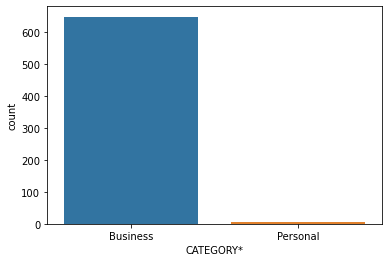

In [29]:
sns.countplot(x='CATEGORY*',data=data)

<AxesSubplot:>

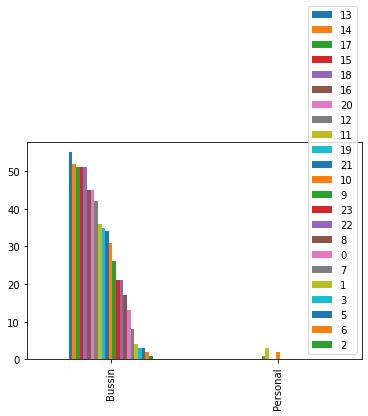

In [31]:

Bussin = data[data['CATEGORY*'] == 'Business']['Hours'].value_counts()
Personal = data[data['CATEGORY*']== 'Personal']['Hours'].value_counts()
df= pd.DataFrame(data= [Bussin,Personal],index = ['Bussin','Personal'])
df.plot(kind='bar')


<AxesSubplot:ylabel='Frequency'>

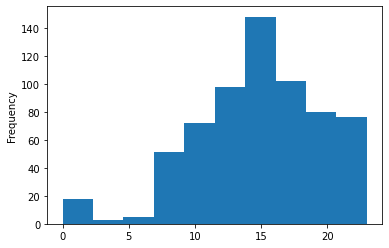

In [33]:

data['Hours'].plot.hist()

- Notice that the people takes the uber in middle day 
- Uber can make discount in the first day to annouce the company make discount and not waste much money 

<AxesSubplot:ylabel='Frequency'>

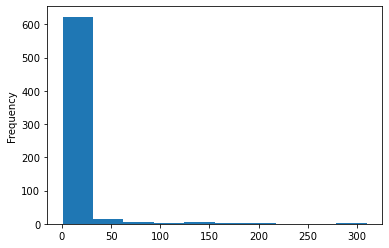

In [44]:
data['MILES*'].plot.hist()

- Notice that the people takes the uber in short distance 

<AxesSubplot:ylabel='Frequency'>

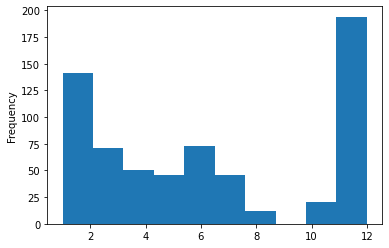

In [43]:
data['Months'].plot.hist()

Notice that the people take uber in las months from year

<AxesSubplot:ylabel='Frequency'>

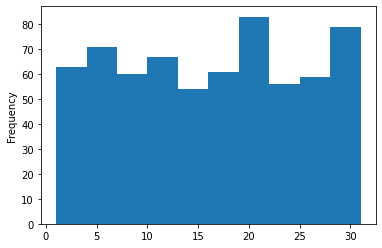

In [38]:
data['Days'].plot.hist()

- Notice that the people takes Uber in middle and last month 

# Checking Purpose  


<AxesSubplot:>

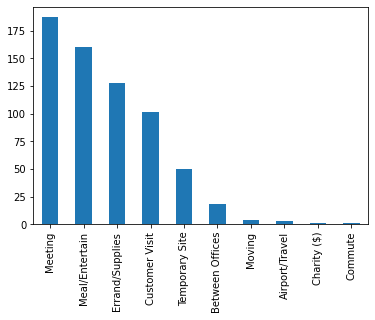

In [41]:
data['PURPOSE*'].value_counts().plot(kind='bar')

- the most place that people go it meeting place 
- Uber can contract with meeting place to advertise advertisement about these places 


# checking the hisgest number of taking uber in days

<AxesSubplot:>

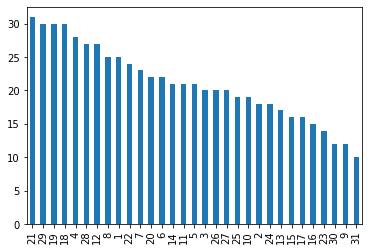

In [42]:
data['Days'].value_counts().plot(kind='bar')

- the day that the largest number of people take uber is 21 , 
- Uber can do discount say 10 percentage in the middle month to attract the people